In [11]:
import importlib

import matplotlib.pyplot as plt
import pandas as pd
import os

from main.utils import data_manage_utils, train_utils

importlib.reload(train_utils)
importlib.reload(data_manage_utils)

loading_folder = "2024_06_17-0642"
loading_spec = "RF"

ROOT_PATH = os.path.abspath("../../../")
TRAIN_DATA_FOLDER = os.path.join(ROOT_PATH, "data/training/training_results/", loading_spec, loading_folder)

# Finding corresponding prep data folder
input_path = os.path.join(TRAIN_DATA_FOLDER, "analysis/pert_complexity.csv")

In [12]:
data = pd.read_csv(input_path)
# Drop the erroneous first column
data = data.drop(columns=[data.columns[0]])
data

,Perturbation Time,Prediction Time,Number of Rows
0,0 days 00:00:31.411111,0 days 00:00:50.634237,592209
1,0 days 00:00:58.549942,0 days 00:01:34.032620,1184418
2,0 days 00:01:27.414565,0 days 00:02:26.193210,1776627
3,0 days 00:01:55.739115,0 days 00:03:02.165465,2367012
4,0 days 00:02:25.328758,0 days 00:03:36.472022,2972960
5,0 days 00:02:54.861749,0 days 00:04:32.751626,3573468
6,0 days 00:03:21.200319,0 days 00:05:30.625065,4165677
7,0 days 00:03:52.464952,0 days 00:06:15.450460,4757886
8,0 days 00:04:24.954492,0 days 00:07:07.473443,5350095
9,0 days 00:04:50.170039,0 days 00:07:19.628398,5942304


In [13]:
# Convert time columns to timedelta and then to seconds
data["Perturbation Time"] = pd.to_timedelta(data["Perturbation Time"]).dt.total_seconds()
data["Prediction Time"] = pd.to_timedelta(data["Prediction Time"]).dt.total_seconds()

# Create a new column for the number of options based on the index
data["Number of Options"] = data.index + 1

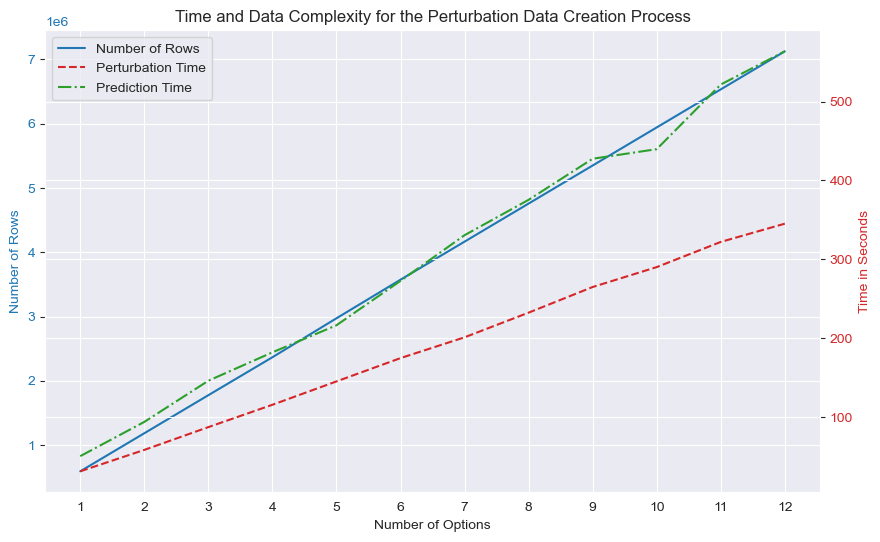

In [14]:
# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for Number of Rows
color = 'tab:blue'
ax1.set_xlabel('Number of Options')
ax1.set_ylabel('Number of Rows', color=color)
line1 = ax1.plot(data["Number of Options"], data["Number of Rows"], color=color, label='Number of Rows')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the time data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time in Seconds', color=color)
line2 = ax2.plot(data["Number of Options"], data["Perturbation Time"], color=color, linestyle='--', label='Perturbation Time')
line3 = ax2.plot(data["Number of Options"], data["Prediction Time"], color='tab:green', linestyle='-.', label='Prediction Time')
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks
plt.xticks(range(1, 13))

# Add a legend
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Show plot
plt.title('Time and Data Complexity for the Perturbation Data Creation Process')
plt.show()

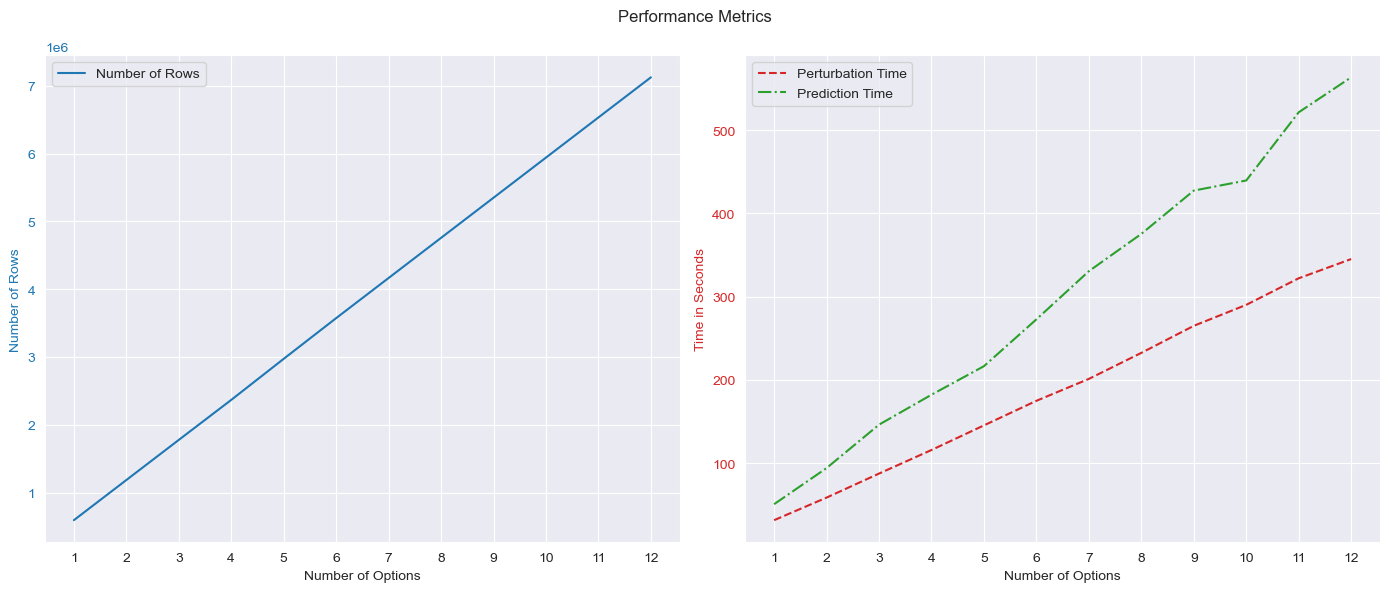

In [15]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Number of Rows on the left subplot
color = 'tab:blue'
ax1.set_xlabel('Number of Options')
ax1.set_ylabel('Number of Rows', color=color)
ax1.plot(data["Number of Options"], data["Number of Rows"], color=color, label='Number of Rows')
ax1.tick_params(axis='y', labelcolor=color)

# Plot for Perturbation Time and Prediction Time on the right subplot
color = 'tab:red'
ax2.set_xlabel('Number of Options')
ax2.set_ylabel('Time in Seconds', color=color)
ax2.plot(data["Number of Options"], data["Perturbation Time"], color=color, linestyle='--', label='Perturbation Time')
ax2.plot(data["Number of Options"], data["Prediction Time"], color='tab:green', linestyle='-.', label='Prediction Time')
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks for both subplots
for ax in [ax1, ax2]:
    ax.set_xticks(range(1, 13))

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# Show plot
plt.suptitle('Performance Metrics')
plt.tight_layout()
plt.show()